# Linear Regression Assignment

## Geely Auto Price Prediction Model

#### Author: Kingshuk Dey

### Problem Statement:

<blockquote> A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.


<br>They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

<ul><li>Which variables are significant in predicting the price of a car</li>
<li>How well those variables describe the price of a car</li></ul>

<br>Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 
</blockquote>

### Business Goal

<blockquote>You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. </blockquote>

### Importing libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas and numpy libraries
import numpy as np
import pandas as pd

# import seaborn and matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set Style
sns.set(style = "whitegrid")

# to split dataset to train and test datasets
from sklearn.model_selection import train_test_split

# Import library for MinMax Scaling of variables
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building
import statsmodels.api as sm

# Check for the VIF values of the feature variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.expand_frame_repr =  False

# Ignore Warnings
warnings.filterwarnings('ignore')

### Read, understand and prepare data

In [2]:
# Read data
cars = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Get record count and number of attributes
cars.shape

(205, 26)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# Set max columns
pd.set_option('display.max_columns', 100)

In [6]:
# Look at sample data
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [7]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [8]:
# Check for missing values
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<blockquote> The data looks clean as there is no missing values </blockquote>

In [9]:
# Dropping Duplicates if any
cars=cars.drop_duplicates()

In [10]:
cars.shape

(205, 26)

There is a variable named **CarName** which is comprised of two parts the first word is the name of **'car company'** and the second is the **'car model'.** 
We need to consider only company name as the independent variable for model building.

In [11]:
#creating a new CarCompany with the with the company name only. Ignoring the car model 
#as it's not required for the model building
cars['CarCompany']=cars['CarName'].str.split(" ").str[0]

In [12]:
# Get unique values of CarCompany
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some mis-spelled CarCompany names, which needs a correction:
1. nissan -> Nissan
2. maxda -> mazda
3. porcshce -> porsche
4. toyouta -> toyota
5. vokswagen -> volkswagen

In [13]:
# Replace the wrong spelling with the correct ones
cars['CarCompany']=cars['CarCompany'].replace({'nissan':'Nissan',
                                     'maxda':'mazda','porcshce':'porsche','toyouta':'toyota',
                                     'vokswagen':'volkswagen'
                                    })

In [14]:
# Get the unique values again
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
# Drop CarName column as CarCompany has already been extracted 
cars.drop(['CarName'],axis=1,inplace=True)

count   205.0000
mean      0.8341
std       1.2453
min      -2.0000
25%       0.0000
50%       1.0000
75%       2.0000
max       3.0000
Name: symboling, dtype: float64


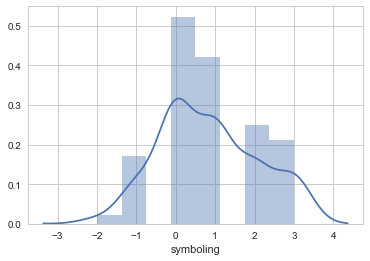

In [16]:
sns.distplot(cars.symboling)
print(cars.symboling.describe())

In [17]:
cars['symboling'] = cars['symboling'].map({-2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [18]:
cars.symboling.unique()

array(['risky', 'moderate', 'safe'], dtype=object)

In [19]:
# car_ID can be dropped as it will not be useful for model building
cars.drop(['car_ID'],axis=1,inplace=True)

In [20]:
cars.shape

(205, 25)

In [21]:
cars.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,risky,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,risky,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi


In [22]:
# Check for missing values
cars.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarCompany          0
dtype: int64

### Exploratory Data Analysis

#### Visualize numeric variables

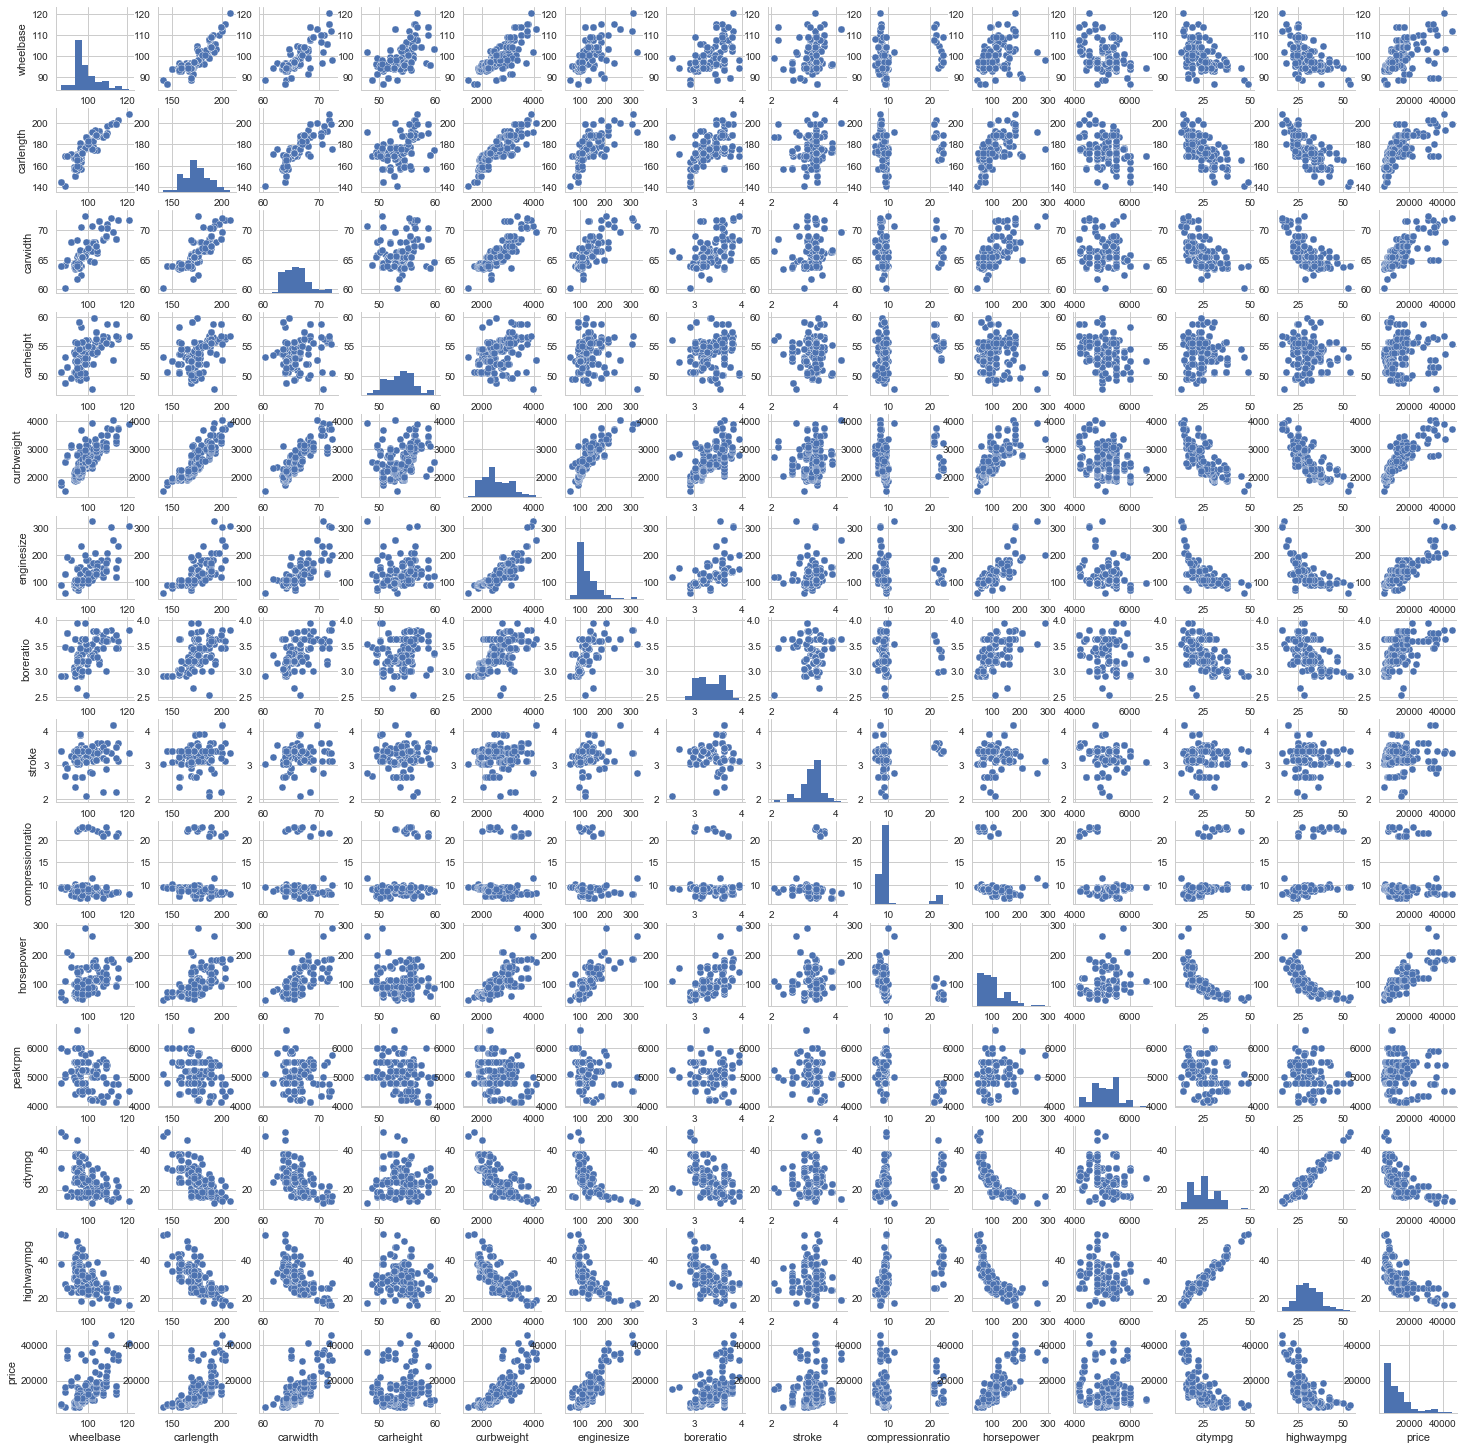

In [23]:
# Pairplot 
pairplot=sns.pairplot(cars)
pairplot.fig.set_size_inches(20,20)
plt.show()

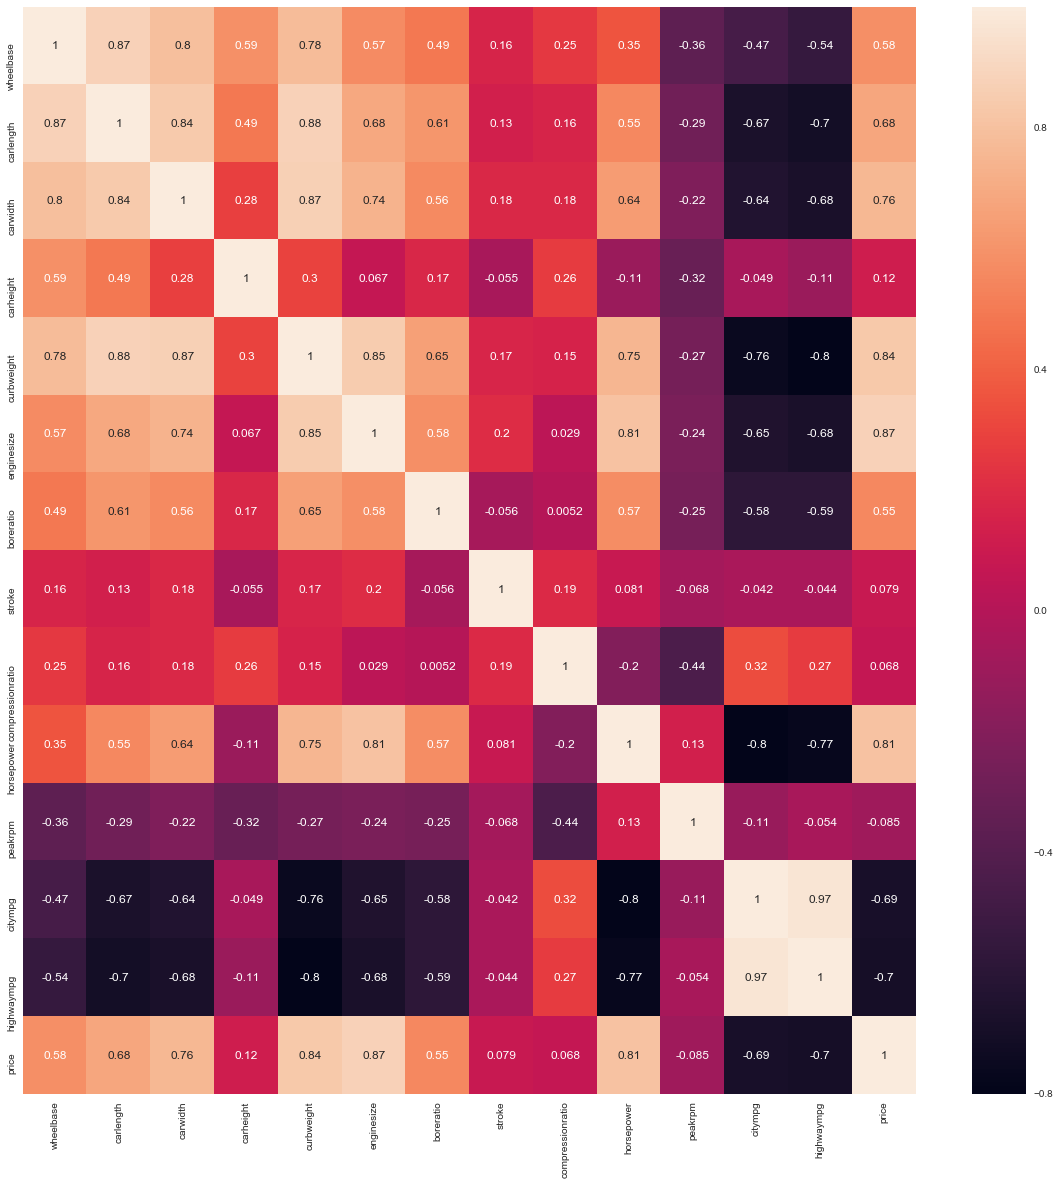

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(cars.corr(), annot = True)
plt.show()

From the above visualizations we can get the correlation between the dependent variable price and the independent variables:

Strongly postive:
<br>enginesize,
curbweight,
horsepower

Moderately postive:
<br>wheelbase,
carlength,
boreratio,
carwidth

Negative correlation:
<br>citympg,
highwaympg

We can also observe correlation between predictor variables, which shows a sign of multicollinearity:
<br>carlength is highly correlated with carwidth. 
<br>Carlength is highly correlated with wheelbase. 
<br>carwidth is highly correlated with crubweight. 
<br>crubweight is highly correlated with horsepower.
<br>horsepower is highly correlated with enginesize.
<br>highwaympg is highly correlated with citympg. 

Also,

<br>carlength correlated with wheelbase, carwidth, curbweight
<br>curbweight correlated  with enginesize, carlength, carwidth, wheelbase
<br>enginesize correlated  with horsepower, crubweight and dimestions of car

<br>and, crubweight,horsepower negaively correlated with the higway/city mpg's

Now let's look at the categorical variables:
<br>Symboling
<br>carCompany
<br>fueltype
<br>aspiration
<br>doornumber
<br>carbody
<br>drivewheel
<br>enginelocation
<br>enginetype
<br>cylindernumber
<br>fuelsystem

#### Check for outliers

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


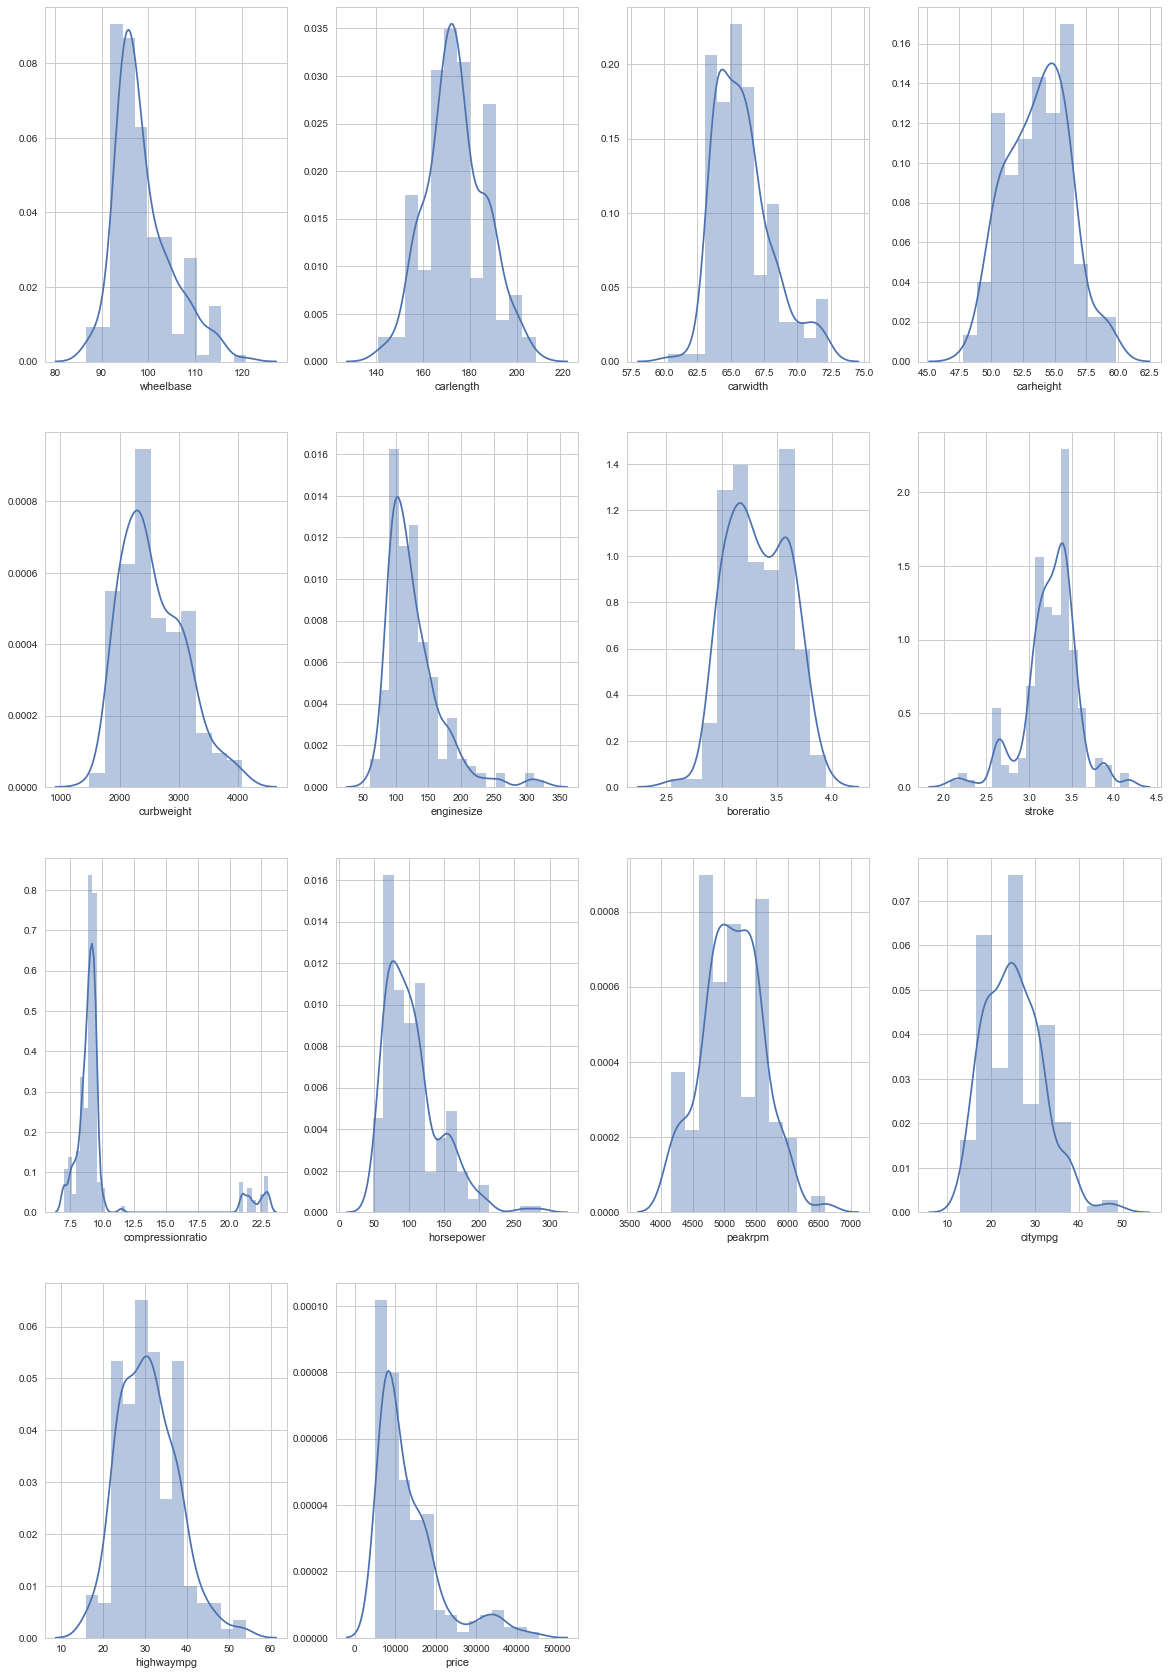

In [25]:
#Function to plot the distribution plot of the numeric variable list
def plot_dist(num_vars):
    plt.figure(figsize=(20, 30))
    for var in num_vars:
        plt.subplot(4,4,num_vars.index(var)+1)
        s=sns.distplot(cars[var])
    plt.show()
    
num_vars = list(cars.columns[cars.dtypes != 'object'])
print(num_vars)
plot_dist(num_vars)

Distribution of following numerical variables are right skewed: enginesize, compressionratio, horsepower.

In [26]:
cars[['enginesize','compressionratio','horsepower']].describe([0.02,0.25,0.5,0.75,0.9,0.98])

,enginesize,compressionratio,horsepower
count,205.0000,205.0000,205.0000
mean,126.9073,10.1425,104.1171
std,41.6427,3.9720,39.5442
min,61.0000,7.0000,48.0000
2%,79.0800,7.0000,56.0000
25%,97.0000,8.6000,70.0000
50%,120.0000,9.0000,95.0000
75%,141.0000,9.4000,116.0000
90%,181.0000,10.9400,160.0000
98%,256.0800,22.9760,206.4400


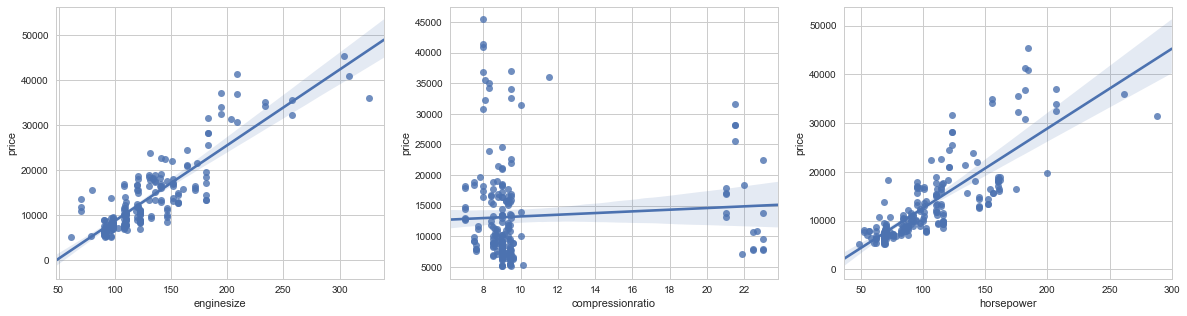

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.regplot(x = 'enginesize',y = 'price',data = cars)
plt.subplot(1,3,2)
sns.regplot(x = 'compressionratio',y = 'price',data = cars)
plt.subplot(1,3,3)
sns.regplot(x = 'horsepower',y = 'price',data = cars)

For enginesize and horsepower, anything above 96 quantile and for compressionratio anything above 90 quantile will be considered as outliers.

In [28]:
# Outilers in price of cars
cars['enginesize'][np.abs(cars['enginesize'] > 256.00)]= 256.00
cars['compressionratio'][np.abs(cars['compressionratio'] > 10.94)]= 10.94
cars['horsepower'][np.abs(cars['horsepower'] > 206.44)]= 182.00

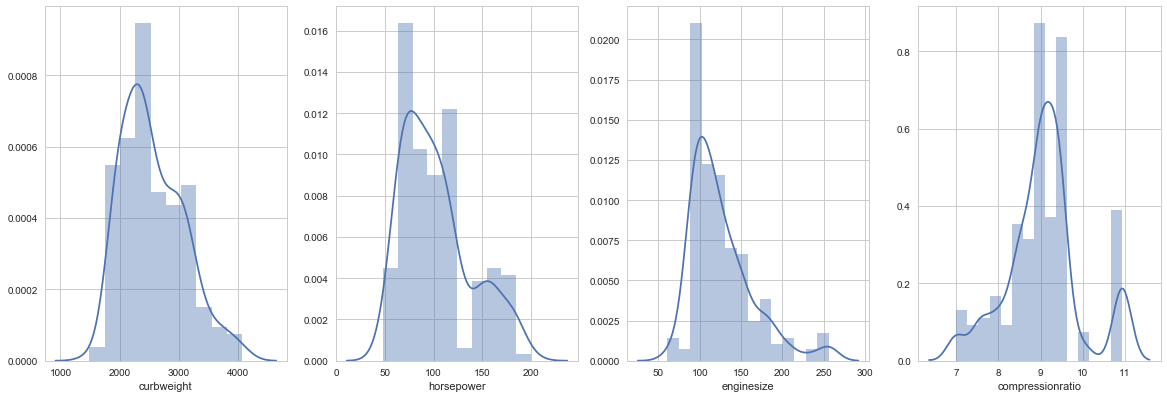

In [29]:
plot_dist(['curbweight','horsepower','enginesize','compressionratio'])

#### Visualizing categorical variables

In [30]:
#Function to create boxplot for the categorical variables
def plot_box(cat_vars):
    plt.figure(figsize=(20, 30))
    for var in cat_vars:
        plt.subplot(4,3,cat_vars.index(var)+1)
        s=sns.boxplot(x = var, y = 'price', data = cars)
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show()

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']


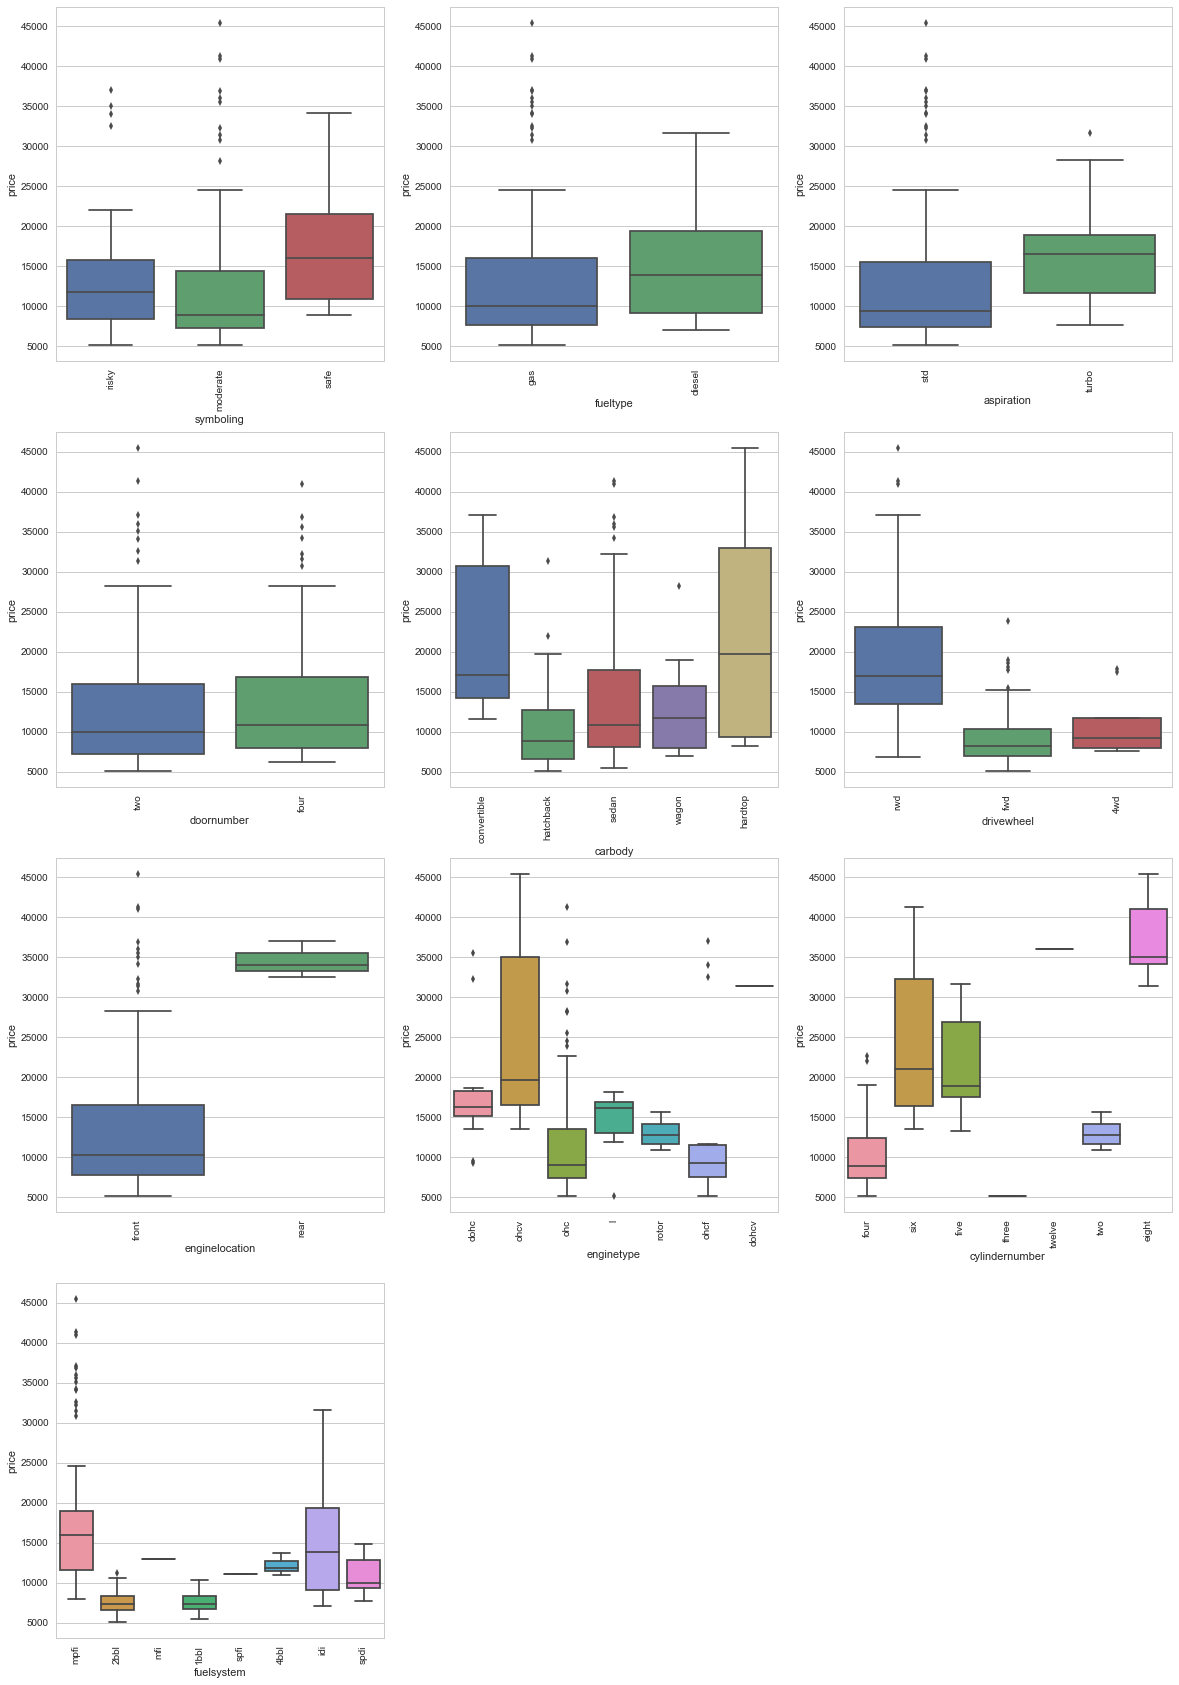

In [31]:
cat_vars=list(cars.columns[cars.dtypes == 'object'])
print(cat_vars)

plot_box(cat_vars[:-1])

**Observations:**
1. Prices of cars of these companies are much higher compared to other companies: bmw, jaguar, buick,porsche
2. Fueltype diesel has relatively higher price than gas
3. Aspiration turbo has significantly higher price over std
4. convertible and hardop carbody has much higher price range
5. drivewheel type rwd has higher price range compared to others
6. enginelocation rear has much higher price range than front
7. enginetype ohcv has relatively higher price range
8. cylindernumber six and eight has higher impact on price
9. fuelsystem mpfi, idi have relatively higher price than other fuelsystem
10. safe cars (i.e. negaive symboling) has relatively higher price
11. doornumber doesn't have signficant impact on price

Cars with below features have comparatively higher price:
1. carcompany: luxury cars
2. fueltype: diesel
3. aspiration: turbo
4. carbody: convertible
5. driverwheel: rwd
6. enginelocation: rear
7. enginetype: ohcv
8. cylindernumber: six, eight
9. fuelsystem: mpfi, idi
10. symboling: -negative values
11. doornumber: no visible impact

Cars with below features have comparatively lower price:
- symboling: moderaterisk
- carbody: hatchback
- driverwheel: fwd
- enginetype: rotor, ohc
- cylindernumber: three
- fuelsystem: 1bbl, 2bbl

In [32]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']


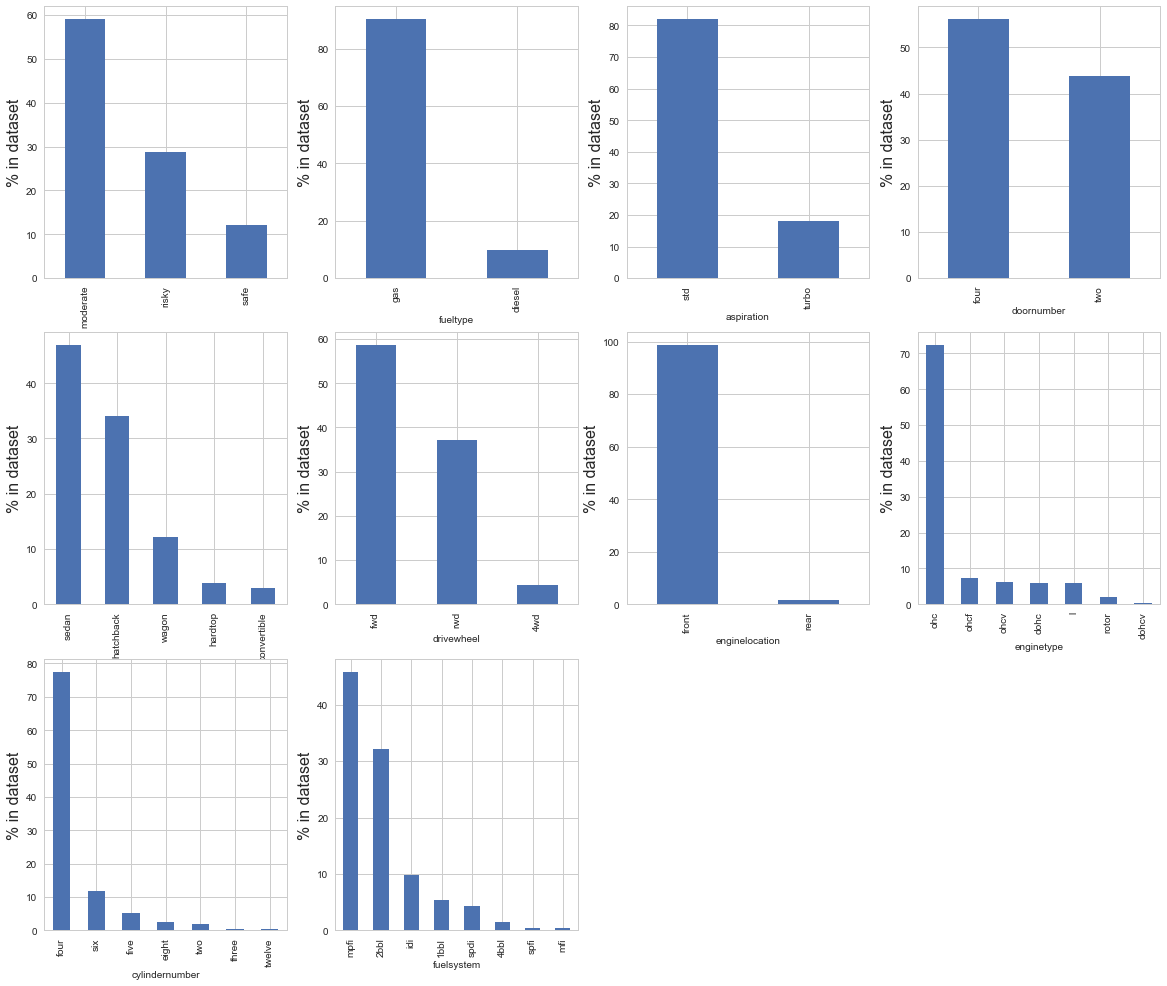

In [33]:
cat_vars=list(cars.columns[cars.dtypes == 'object'])
print(cat_vars)

plot_percentages(cars, cat_vars[:-1])

Features that are most common/popular as per the given dataset:
- symboling: moderaterisk
- fueltype: gas
- aspiration: standard
- doornumbers: four
- Carbody: Sedan
- drivewheel: fwd
- engine location: front
- engine type: ohc
- cylinderNumber: four
- fuelSystem: mpfi

Features that are least common/popular as per the given dataset:
- symboling: safe
- fueltype: diesel
- aspiration: turbo
- doornumbers: two
- Carbody: convertible
- drivewheel: 4wd
- engine location: rear
- engine type: dohcv
- cylinderNumber: three, twelve
- fuelSystem: mfi

### Data Preparation

#### Categorical variables

In [34]:
# Finding unique values per variable
cat_vars = cars[cars.columns[cars.dtypes == 'object']]

for i in cat_vars:
    print(i + " unique values are:")
    print(cars[i].unique()) 
    
print("Levels of Categorical Variables are:")
for i in cat_vars:
    print("Level of " + i + " is:" , cars[i].nunique()) 

symboling unique values are:
['risky' 'moderate' 'safe']
fueltype unique values are:
['gas' 'diesel']
aspiration unique values are:
['std' 'turbo']
doornumber unique values are:
['two' 'four']
carbody unique values are:
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel unique values are:
['rwd' 'fwd' '4wd']
enginelocation unique values are:
['front' 'rear']
enginetype unique values are:
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber unique values are:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem unique values are:
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
CarCompany unique values are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'vw' 'volvo']
Levels of Categorical Variables are:
Level of symboling is: 3
Level of fueltype is: 2
Level of aspiration is: 2
Level of doornu

In [35]:
# map categorical variables with Level = 2
cars['fueltype']=cars['fueltype'].map({'gas':0,'diesel':1})
cars['aspiration']=cars['aspiration'].map({'std':0,'turbo':1})
cars['doornumber']=cars['doornumber'].map({'two':0,'four':1})
cars['enginelocation']=cars['enginelocation'].map({'front':0,'rear':1})

#### Dummy variables

In [36]:
# Get dummy variables for variables with level > 2.
# Not dropping first column by default
cars = pd.get_dummies(cars, columns=['symboling','drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
cars.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,symboling_moderate,symboling_risky,symboling_safe,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [37]:
# Distribution of Car price
cars.price.describe([0.25,0.4,0.5,0.8])

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
40%      9036.6000
50%     10295.0000
80%     17493.8000
max     45400.0000
Name: price, dtype: float64

In [38]:
# Get the median values of car price by car company
print(cars.groupby('CarCompany')['price'].median().sort_values())

CarCompany
chevrolet      6295.0000
honda          7295.0000
dodge          7609.0000
plymouth       7609.0000
subaru         7894.0000
Nissan         8124.0000
mitsubishi     8499.0000
isuzu          8916.5000
volkswagen     8995.0000
toyota         9103.0000
renault        9595.0000
mazda         10595.0000
vw            10787.5000
saab          15275.0000
alfa-romero   16500.0000
mercury       16503.0000
peugeot       16630.0000
audi          17710.0000
volvo         18420.0000
bmw           22835.0000
porsche       32528.0000
buick         32892.0000
jaguar        35550.0000
Name: price, dtype: float64


In [39]:
cars_category=cars.groupby('CarCompany').median()

In [40]:
pricelabels=['LowPricedCars','MediumPricedCars','HighPricedCars']
bins = [0, 10000, 20000, 50000]

# Get dummy variables for car category
cars_category = pd.get_dummies(pd.cut(cars_category.price, bins, labels=pricelabels))

In [41]:
LowPricedCars = ['chevrolet','honda','dodge','plymouth','subaru','Nissan','mitsubishi','isuzu','volkswagen','toyota','renault']
MediumPricedCars = ['mazda','vw','saab','alfa-romero','mercury','peugeot','audi','volvo']
HighPricedCars = ['bmw','porsche','buick','jaguar']

In [42]:
def maphighpricedcars(carCompanies):
    val = 0
    if carCompanies in HighPricedCars:
        val = 1
    else:
        val = 0
        
    return int(val)


cars['HighPricedCars'] = 0
cars['HighPricedCars'] = cars['CarCompany'].apply(maphighpricedcars) 

In [43]:
def mapmediumpricedcars(carCompanies):
    val = 0
    if carCompanies in MediumPricedCars:
        val = 1
    else:
        val = 0
        
    return int(val)


cars['MediumPricedCars'] = 0
cars['MediumPricedCars'] = cars['CarCompany'].apply(mapmediumpricedcars)

In [44]:
cars.drop(labels=['CarCompany'], axis = 1, inplace=True)

In [45]:
cars.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_moderate,symboling_risky,symboling_safe,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighPricedCars,MediumPricedCars
0,0,0,0,0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


Comparing the impact on price and popularty/feature being common, below dummy variables will be dropped to keep the level n-1:

- symboling_risky
- carbody_hatchback
- drivewheel_4wd
- enginetype_rotor
- cylindernumber_three
- fuelsystem_1bbl

In [46]:
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
cars.drop(['symboling_risky',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_rotor',
         'cylindernumber_three',
         'fuelsystem_1bbl'],axis=1,inplace=True)

#### Dealing with Numerical variables

To reduce multicollinearity , observations from the Heatmap will be used. Based on the previous analysis, following columns can be dropped, keeping the variables strongly correlated to Price:
['carwidth', 'carlength', 'carheight' ,'highwaympg', 'citympg']

The reason for dropping 'carwidth', 'carlength' is that these two variables are strongly correlated to 'curbweight'. But as 'curbweight' is more highly correlated to price, we will keep it and drop 'carwidth', 'carlength'.

The reason for dropping 'highwaympg', 'citympg' is that they both are very highly correlated to each other but have a very low correlation with price.

Create a derived variable before dropping columns carwidth and carlength which can handle multicollinearity.

In [47]:
# creating derived variable
cars['ground_cover_area']=cars.carwidth*cars.carlength

In [48]:
# dropping the actual columns
cars.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

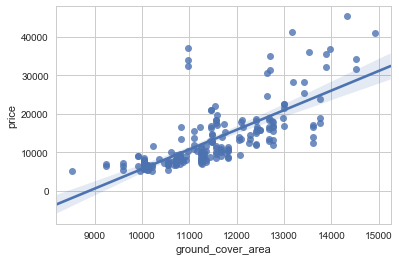

In [49]:
sns.regplot(y='price',x='ground_cover_area',data= cars)

In [50]:
cars.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,symboling_moderate,symboling_safe,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighPricedCars,MediumPricedCars,ground_cover_area
0,0,0,0,0,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,13495.0000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,10820.0800
1,0,0,0,0,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,16500.0000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,10820.0800
2,0,0,0,0,94.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,16500.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,11213.6000
3,0,0,1,0,99.8000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,13950.0000,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,11690.9200
4,0,0,1,0,99.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,17450.0000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,11726.2400


## Splitting the Data into Training and Testing Sets

In [51]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#split data into train=70% and test=30% sets
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling Features

In [52]:
# Rescale using MinMax scalar
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'curbweight', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','price','ground_cover_area']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [53]:
df_train.head(5)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,symboling_moderate,symboling_safe,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,HighPricedCars,MediumPricedCars,ground_cover_area
122,0,0,1,0,0.2448,0.2655,0.2727,0.1897,0.2302,0.5253,0.6091,0.1316,0.5510,0.0688,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.3598
125,0,0,0,0,0.2724,0.2124,0.5004,0.4615,1.0000,0.4646,0.6345,0.6250,0.5510,0.4669,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.5031
166,0,0,0,0,0.2724,0.4248,0.3150,0.1897,0.4444,0.4495,0.6091,0.4211,1.0000,0.1221,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.3803
1,0,0,0,0,0.0690,0.0885,0.4112,0.3538,0.6270,0.2475,0.5076,0.4145,0.3469,0.3144,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.3841
199,0,1,1,0,0.6103,0.8584,0.6474,0.3538,0.7460,0.4848,0.1269,0.7500,0.3878,0.3821,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.6944


### Dividing training data into X and y sets for the model building

In [54]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

Create User defined functions

In [55]:
def StatsModel(data):
    # Adding a constant variable 
    X_train_lm = sm.add_constant(data)
    
    # Run the linear model
    lm = sm.OLS(y_train, X_train_lm).fit() 
    
    return lm

def VIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [56]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 17),
 ('aspiration', False, 7),
 ('doornumber', False, 26),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 11),
 ('curbweight', False, 8),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('symboling_moderate', False, 27),
 ('symboling_safe', False, 16),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 19),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 24),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 25),
 ('enginetype_dohc', False, 13),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 14),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 10),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two',

In [58]:
# Lets see the columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'carbody_convertible', 'enginetype_dohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'HighPricedCars',
       'ground_cover_area'],
      dtype='object')

In [59]:
# Lets see the variables the are rejected by RFE - 
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carheight', 'curbweight',
       'compressionratio', 'peakrpm', 'symboling_moderate', 'symboling_safe',
       'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'MediumPricedCars'],
      dtype='object')

### Lets now build our model using statsmodel, to get the detailed statistics

### Model 1

We will build our first model using the variables that rfe supported above.

In [60]:
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train[col]

# Run the linear model
stats_model_1 = StatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.05e-67
Time:                        16:04:45   Log-Likelihood:                 209.99
No. Observations:                 143   AIC:                            -388.0
Df Residuals:                     127   BIC:                            -340.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

### Model 2

Looking at the statistics of model 1, we observe that variable - <b>cylindernumber_twelve</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [61]:
# Lets now create a data set only with RFE supported columns.
X_train_2 = X_train_1.drop('cylindernumber_twelve', axis=1)

# Run the linear model
stats_model_2 = StatsModel(X_train_2)

#Let's see the summary of the linear model built above
print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.74e-67
Time:                        16:04:45   Log-Likelihood:                 209.10
No. Observations:                 143   AIC:                            -388.2
Df Residuals:                     128   BIC:                            -343.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0088 

In [62]:
# Calculate the VIFs again for the new model
vif = VIF(X_train_2)

# Let's see the vif values
vif

,Features,VIF
13,ground_cover_area,78.9700
1,wheelbase,35.3500
2,enginesize,31.1100
3,boreratio,20.6300
5,horsepower,15.9900
4,stroke,13.3200
10,cylindernumber_four,11.3900
11,cylindernumber_six,4.9600
8,cylindernumber_eight,2.9100
12,HighPricedCars,2.6800


### Model 3

Looking at the statistics of model 2, we observe that variable - <b>stroke</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [63]:
# Lets now create a data set only with RFE supported columns.
X_train_3 = X_train_2.drop('stroke', axis=1)

# Run the linear model
stats_model_3 = StatsModel(X_train_3)

#Let's see the summary of the linear model built above
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.21e-68
Time:                        16:04:45   Log-Likelihood:                 208.64
No. Observations:                 143   AIC:                            -389.3
Df Residuals:                     129   BIC:                            -347.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0101 

### Model 4

Looking at the statistics of model 3, we observe that variable - <b>enginetype_dohcv</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [64]:
# Lets now create a data set only with RFE supported columns.
X_train_4 = X_train_3.drop('enginetype_dohcv', axis=1)

# Run the linear model
stats_model_4 = StatsModel(X_train_4)

#Let's see the summary of the linear model built above
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     146.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.47e-69
Time:                        16:04:45   Log-Likelihood:                 208.27
No. Observations:                 143   AIC:                            -390.5
Df Residuals:                     130   BIC:                            -352.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0116 

### Model 5

Looking at the statistics of model 4, we observe that variable - <b>cylindernumber_eight</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [65]:
# Lets now create a data set only with RFE supported columns.
X_train_5 = X_train_4.drop('cylindernumber_eight', axis=1)

# Run the linear model
stats_model_5 = StatsModel(X_train_5)

#Let's see the summary of the linear model built above
print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.12e-70
Time:                        16:04:46   Log-Likelihood:                 207.73
No. Observations:                 143   AIC:                            -391.5
Df Residuals:                     131   BIC:                            -355.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0216    

### Model 6

Looking at the statistics of model 5, we observe that variable - <b>boreratio</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [66]:
# Lets now create a data set only with RFE supported columns.
X_train_6 = X_train_5.drop('boreratio', axis=1)

# Run the linear model
stats_model_6 = StatsModel(X_train_6)

#Let's see the summary of the linear model built above
print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     174.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.41e-71
Time:                        16:04:46   Log-Likelihood:                 206.79
No. Observations:                 143   AIC:                            -391.6
Df Residuals:                     132   BIC:                            -359.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0220    

### Model 7

Looking at the statistics of model 6, we observe that variable - <b>cylindernumber_five</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [67]:
# Lets now create a data set only with RFE supported columns.
X_train_7 = X_train_6.drop('cylindernumber_five', axis=1)

# Run the linear model
stats_model_7 = StatsModel(X_train_7)

#Let's see the summary of the linear model built above
print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.70e-72
Time:                        16:04:46   Log-Likelihood:                 205.76
No. Observations:                 143   AIC:                            -391.5
Df Residuals:                     133   BIC:                            -361.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0392    

### Model 8

Looking at the statistics of model 7, we observe that variable - <b>enginesize</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [68]:
# Lets now create a data set only with RFE supported columns.
X_train_8 = X_train_7.drop('enginesize', axis=1)

# Run the linear model
stats_model_8 = StatsModel(X_train_8)

#Let's see the summary of the linear model built above
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.18e-72
Time:                        16:04:46   Log-Likelihood:                 204.44
No. Observations:                 143   AIC:                            -390.9
Df Residuals:                     134   BIC:                            -364.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0434    

### Model 9

Looking at the statistics of model 7, we observe that variable - <b>cylindernumber_six</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [69]:
# Lets now create a data set only with RFE supported columns.
X_train_9 = X_train_8.drop('cylindernumber_six', axis=1)

# Run the linear model
stats_model_9 = StatsModel(X_train_9)

#Let's see the summary of the linear model built above
print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     242.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.64e-73
Time:                        16:04:46   Log-Likelihood:                 203.38
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     135   BIC:                            -367.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0536    

### Model 10

Looking at the statistics of model 7, we observe that variable - <b>wheelbase</b> has a high p-value and thus is insignificant to our model. Let's go ahead and drop it & build a new model with the remaining variables.

In [70]:
X_train_10 = X_train_9.drop('wheelbase', axis=1)
X_train_10 = sm.add_constant(X_train_10)
lm = sm.OLS(y_train,X_train_10).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     277.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.08e-73
Time:                        16:04:46   Log-Likelihood:                 201.63
No. Observations:                 143   AIC:                            -389.3
Df Residuals:                     136   BIC:                            -368.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0552    

In [71]:
# Calculate the VIFs again for the new model
vif = VIF(X_train_10)

# Let's see the vif values
vif

,Features,VIF
0,const,22.6600
2,horsepower,2.7800
4,cylindernumber_four,2.0500
6,ground_cover_area,2.0000
5,HighPricedCars,1.5900
1,enginelocation,1.1400
3,carbody_convertible,1.0400


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [72]:
X_train_10.columns

Index(['const', 'enginelocation', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'HighPricedCars', 'ground_cover_area'],
      dtype='object')

In [73]:
y_train_price = lm.predict(X_train_10)

Text(0.5,0,'Errors')

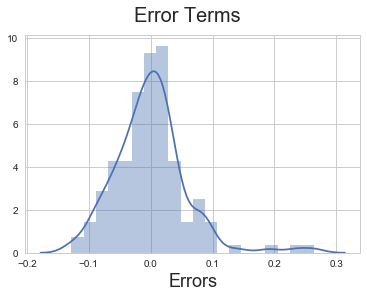

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Although not the perfect normal distribution and centered not perfectly but almost around zero. There is some error variance along the tails meaning model is still not able to explain some variance. considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

## Making Predictions
Before making any inference about the equation of the linear regression, let's test it on the test set

#### Applying the scaling on the test sets
Applying the transformation on the test set using the learning of the train set therefore we only transform.<br>
we only use those variables which we used to train the final model. So lets use only those.

In [75]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'curbweight', 'carheight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','price','ground_cover_area']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('price')
X_test = df_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_10= X_train_10.drop(['const'], axis=1)
X_test_new = X_test[X_train_10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'y_pred')

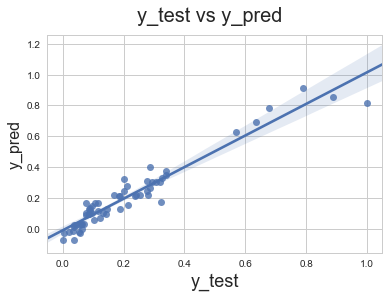

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

y_test VS y_pred is observed to be almost linear with some variataion occuring. Overall, it is a pretty linear spread.

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.05948549431471009
Model r2_score: 0.919149013387


r2_score (0.919) on the test data is very close to the trained Adj. R-Squared value (0.921) of the model. we have a significantly high r2_score and a low RMSE of 0.059.

#### Final Inference from Model Evaluation

With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

Final predictors which can be proposed are

| Predictor | Coef | p-value |
| --- | --- | --- |
| enginelocation | 0.2105 | 0.002 |
| horsepower | 0.2327 | 0.000 |
| carbody_convertible | 0.1350 | 0.000 |
| cylindernumber_four | -0.0581 | 0.001 |
| HighPricedCars | 0.2707 | 0.000 |
| ground_cover_area | 0.4082 | 0.000 |

We can see that the equation of our best fitted line is:

**$ price = -0.0552 + 0.2105  \times  enginelocation + 0.2327 \times horsepower + 0.1350 \times carbody\_convertible - 0.0581 \times cylindernumber\_four + 0.2707 \times HighPricedCars + 0.4082 \times ground\_cover\_area $**

This equation implies how the price of the vehical changes with a unit change in any of these independent variable with all other variables held constant.<br>For example we can say, the price of the car changes by 0.2327 for every unit change in the horsepower if all other variables are held constant. And so is true for all other variables.
<br> The predictor carbody_convertible suggest that the price of car increases by a factor of 0.1350 when the car body is convertible.
<br> The cylinder_number_four is the most commonly available feature and since having 4 cylinder is attributed with relatively low price cars the coeffeciant for this variable is negative.
<br> The company name is also essensial in determining the price the automobile. High tier companies names like, BMW, Buik, Porsche and Jaguar further adds up to the price by a factor of 0.2707.
<br> enginelocation suggest that the price of car increases by a factor of 0.2105 depending upon the enginelocation (fron or rear).
<br> price is also dependent on ground_cover_area and increases by a factor of 0.4082 for every unit of dimension changes if all the other variables held constant.

Overall it seems to be a decent model:

| Adj. R-squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- |
| 0.921 | 0.919 | 1.08e-73 | -389.3 | -368.5 | 0.059